### Simple example - Implementation of Markov Chain Monte Carlo
Carlos J. Arguello, Ph.D

MCMC is often used to estimate the posterior distribution given a likelihood and a prior using Bayes' Theorem.
The posterior distribution is often impossible to obtain in closed form (unless a conjugate prior is used). 

This is a simple example ilustrating the MCMC method using the Metropolis algorithm to obtain the posterior
given a prior, and some synthetic data. For comparison purposes, I will implement a problem with closed analytical solution, and then we will 
check how the MCMC converges to the analytical solution

Problem: Lets suppose we have data sampled from a gaussian distribution with mean mu, known variance sigma^2. 
We would like to estimate the posterior distribution of the parameter mu. 
It is easy to show that, given N i.i.d. samples ${x_1, x_2, ..., x_N}$ with mean $\mu$ and variance $\sigma^2$,
and if we assume a gaussian prior for the mean:

$$\rho(\mu) = \frac{1}{2\pi\alpha^2}exp[-(\mu - \gamma)^2/2\alpha^2]$$

The posterior distribution is:

$$\rho(\mu|x_{1:N}) = \frac{1}{2\pi\sigma_{\mu}^2}exp[-(\mu - \Delta)^2/2\sigma_{\mu}^2]$$

Where the parameters $\Delta, \sigma_{\mu}$ of the posterior $\rho(\mu|x_{1:N})$ are:
$$\sigma_\mu^2 = \left(\frac{1}{\alpha^2} + \frac{N}{\sigma^2}\right)$$
$$\Delta = \frac{1}{\alpha^2+\sigma^2/N}\left(\bar{x}\alpha^2 + \gamma\frac{\sigma^2}{N}\right)$$


In [1]:
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
# Parameters of likelihood:
sigma_l = 0.5
mu_l = 1 
N_data = 1000

# Generate data:

simulated_data = np.random.normal(loc=mu_l, scale=sigma_l, size=N_data)

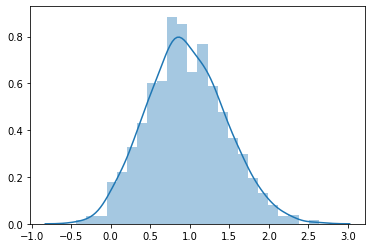

In [3]:
sns.distplot(simulated_data)

In [4]:
# Prior parameters:
sigma_prior = 1
mean_prior = 0

# Posterior distribution:
sigma_post = (1/sigma_prior**2 + N_data/sigma_l**2)**(-1)

In [5]:
sigma_post

0.00024993751562109475

In [6]:
# Define target distribution
target_dist = lambda x: np.sin(x)*np.sin(2*x)**2*(1/np.sqrt(2*np.pi)*np.exp(-x**2/2))

In [7]:
x_target = []
x_current = 0
scale = 0.2
for i in range(1000000):
    x_proposal = x_current-np.random.uniform(low=-scale/2, high=scale/2)    # q(x_t+1|x_t) -- Proposal dist is uniform [-1,1]. 
    if np.random.uniform() < min(1,target_dist(x_proposal)/target_dist(x_current)):
        x_target.append(x_proposal)
        x_current = x_proposal

/Users/carlosjarguello/miniconda3/envs/DS/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


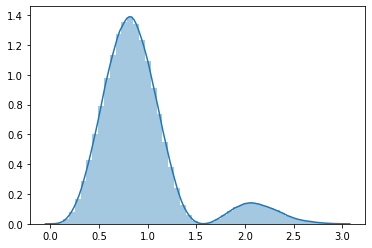

In [8]:
sns.distplot(x_target)

In [9]:
np.random.uniform(low=-scale/2, high=scale/2)

0.073883574821719